## Предсказание объемов продаж на ограниченом объеме

In [1]:
%pylab inline
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics
from sklearn import grid_search
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import SGDRegressor

import xgboost as xgb

from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.metrics import auc, mean_squared_error, log_loss, roc_auc_score, zero_one_loss, accuracy_score, precision_score, recall_score

from hyperopt import hp, tpe, STATUS_OK, Trials, rand
from hyperopt import fmin as fminHyper

import MySQLdb

from math import ceil

from datetime import timedelta
import datetime

from sklearn.model_selection import TimeSeriesSplit

import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


**Загрузка данных**

In [ ]:
data = pd.read_csv('../data/prepared_data.csv', sep=';', index_col=0)
# wdata = pd.read_csv('../data/4y_prepared_data.csv', sep=';')
data

,FlightID,Code,resHoldTotal,DptDt,fltNrDptDt,fltNrArrDt,DptTime,ArrTime,flightNrSf,segment,...,MonthArr,QuarterArr,YearArr,IsWeekendArr,LagDptDt,lag_1,lag_4,lag_12,lag_52,lag_156
0,25,0,0.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
1,25,1,0.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
2,25,2,5.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
3,25,3,2.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
4,25,0,2.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
5,25,1,3.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
6,25,2,1.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
7,25,3,0.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
8,25,0,0.0,2016-05-26,2016-05-26,2016-05-27,20,7,0,2,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088
9,25,1,11.0,2016-05-26,2016-05-26,2016-05-27,20,7,0,2,...,5,2,2016,0,2015-05-27,1107.375,1074.344828,1042.129412,976.394521,980.712088


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172877 entries, 0 to 191611
Data columns (total 28 columns):
FlightID          172877 non-null int64
Code              172877 non-null int64
resHoldTotal      172877 non-null float64
DptDt             172877 non-null object
fltNrDptDt        172877 non-null object
fltNrArrDt        172877 non-null object
DptTime           172877 non-null int64
ArrTime           172877 non-null int64
flightNrSf        172877 non-null int64
segment           172877 non-null int64
DayOfWeekDpt      172877 non-null int64
WeekOfMonthDpt    172877 non-null int64
MonthDpt          172877 non-null int64
QuarterDpt        172877 non-null int64
YearDpt           172877 non-null int64
IsWeekendDpt      172877 non-null int64
DayOfWeekArr      172877 non-null int64
WeekOfMonthArr    172877 non-null int64
MonthArr          172877 non-null int64
QuarterArr        172877 non-null int64
YearArr           172877 non-null int64
IsWeekendArr      172877 non-null int64
LagD

{0: '10J', 1: '50M', 2: '9J', 3: '49J', 4: '337J', 5: '337ZH', 6: '138J', 7: '137YQ', 8: '102J', 9: '101J', 10: '88J', 11: '87J'}

In [134]:
for flt in data.flightNrSf.unique():
    print(flt, min(data[data.flightNrSf == flt].fltNrDptDt))


0 2015-02-27
1 2015-02-27
2 2015-02-27
3 2015-09-23
4 2015-05-20
5 2015-06-01


**Временные ряды**

In [ ]:
series = pd.DataFrame(data[data.flightNrSf == 0].groupby(['DptDt'])['resHoldTotal'].sum()).add_suffix('Sum').reset_index()
series.sort_values(['DptDt'], inplace = True)
series

In [ ]:
x = np.arange(0, len(series))
plt.figure(figsize = (20, 15))
plt.plot(pd.DatetimeIndex(series.DptDt), series.resHoldTotalSum)

In [137]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

#     # добавляем лаги исходного ряда в качестве признаков
#     for i in range(lag_start, lag_end):
#         data["lag_{}".format(i)] = data.y.shift(i)

#     data.index = data.index.to_datetime()
#     data["weekday"] = pd.DatetimeIndex(data.index).weekday
#     data['WeekOfMonth'] = [week_of_month(x) for x in pd.DatetimeIndex(data.index)]
#     data['MonthDpt'] = pd.DatetimeIndex(data.index).month 
#     data['QuarterDpt'] = pd.DatetimeIndex(data.index).quarter 
#     data['YearDpt'] = pd.DatetimeIndex(data.index).year
#     data['is_weekend'] = data.weekday.isin([5,6])*1

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [ ]:
def XGB_forecast(data, lag_start=5, lag_end=20, test_size=0.15, scale=1.96):

    # исходные данные
    X_train, X_test, y_train, y_test = prepareData(data, lag_start, lag_end, test_size)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'nthread' : 4,
        'objective': 'reg:linear',
        'booster':'gblinear'
    }
    trees = 1000

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees, early_stopping_rounds=50)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = bst.predict(dtrain)
    plt.figure(figsize=(20, 15))
    plt.plot(prediction_train)
    plt.plot(y_train)
    plt.axis('tight')
    plt.grid(True)

    # и на тестовом
    prediction_test = bst.predict(dtest)
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(20, 15))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend()

In [138]:
series.set_index('DptDt', inplace=True)
series.index.name = None
series

,resHoldTotalSum
2015-02-27,1197.0
2015-02-28,1085.0
2015-03-01,1070.0
2015-03-02,1046.0
2015-03-03,1008.0
2015-03-04,1055.0
2015-03-05,1027.0
2015-03-06,1418.0
2015-03-07,282.0
2015-03-08,257.0


In [ ]:
XGB_forecast(series, test_size=0.2, lag_start=5, lag_end=100)

**Деление данных на тренировочную и тестовую выборки**

In [139]:
test_data = data[data.YearDpt == 2017][(data.MonthDpt == 3)|(data.MonthDpt == 2)].copy()
test_y = test_data.resHoldTotal.copy()

# data = data[data.fltNrDptDt >= '2016-04-01']

data = data.drop(test_data.index.values).copy()
y = data.resHoldTotal.copy()

In [140]:
test_data.drop('fltNrArrDt', axis = 1, inplace = True)
test_data.drop('DptDt', axis = 1, inplace = True)
test_data.drop('resHoldTotal', axis = 1, inplace = True)

data.drop('fltNrArrDt', axis = 1, inplace = True)
data.drop('DptDt', axis = 1, inplace = True)
data.drop('resHoldTotal', axis = 1, inplace = True)

In [142]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = list()
y_test = list()


for flt in data.flightNrSf.unique():  
    data1 = data[data.flightNrSf == flt].copy()
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, y[data1.index], test_size = 0.2, random_state = 25)
            
    X_train = pd.concat([X_train, X_train1])
    X_test = pd.concat([X_test, X_test1])
    y_train.extend(y_train1)
    y_test.extend(y_test1)


X_train = pd.concat([X_train, X_train1])
X_test = pd.concat([X_test, X_test1])
y_train.extend(y_train1)
y_test.extend(y_test1)

# X_test = data[data.YearDpt == 2017].copy()
# y_test = y[X_test.index]

# X_train = data.drop(X_test.index).copy()
# y_train = y[X_train.index]

# dtrain = xgb.DMatrix(X_train.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1), y_train)
# dvalid = xgb.DMatrix(X_test.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1), y_test)
# dtest = xgb.DMatrix(test_data.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1), test_y)

dtrain = xgb.DMatrix(X_train.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1).drop("LagDptDt", axis = 1), y_train)
dvalid = xgb.DMatrix(X_test.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1).drop("LagDptDt", axis = 1), y_test)
dtest = xgb.DMatrix(test_data.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1).drop("LagDptDt", axis = 1), test_y)

**Модель**

In [42]:
def score(params):
    print("Training with params:")
    print(params)
    
    num_round = int(params['n_estimators'])    
    del params['n_estimators']
    params['max_depth'] = (int) (params['max_depth'])
    
    model = xgb.train(params, dtrain, num_round)
    
    predictions = model.predict(dvalid).reshape((X_test.shape[0], 1))
    score = mean_squared_error(y_test, predictions)
    
    print("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

In [145]:
def optimize(trials):

    space = {
        'n_estimators' : 75,
        'eta' : hp.quniform('eta', 0.05, 0.5, 0.05),
        'max_depth' : hp.quniform('max_depth', 4, 10, 2),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 8, 1),
        'subsample' : hp.quniform('subsample', 0.5, 1, 0.25),
        'gamma' : 0,
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.25),
        'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.5, 1, 0.25),
#         'reg_alpha' : hp.quniform('reg_alpha', 0, 1, 0.25),
#         'reg_lambda' : hp.quniform('reg_lambda', 0, 1, 0.25),
        'objective': 'reg:linear',
        'nthread' : 4,
        'silent' : 1
    }
    
    best = fminHyper(score, space, algo=tpe.suggest, trials=trials, max_evals=75)

    print(best)

In [146]:
%%time
trials = Trials()
optimize(trials)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001BF91E96908>>
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 343, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


Training with params:
{'eta': 0.30000000000000004, 'max_depth': 6.0, 'gamma': 0, 'colsample_bytree': 1.0, 'objective': 'reg:linear', 'nthread': 4, 'subsample': 0.5, 'colsample_bylevel': 1.0, 'silent': 1, 'n_estimators': 75, 'min_child_weight': 2.0}
	Score 43.90004898405723


Training with params:
{'eta': 0.05, 'max_depth': 8.0, 'gamma': 0, 'colsample_bytree': 1.0, 'objective': 'reg:linear', 'nthread': 4, 'subsample': 0.5, 'colsample_bylevel': 0.5, 'silent': 1, 'n_estimators': 75, 'min_child_weight': 3.0}
	Score 58.77965207833918


Training with params:
{'eta': 0.2, 'max_depth': 6.0, 'gamma': 0, 'colsample_bytree': 0.75, 'objective': 'reg:linear', 'nthread': 4, 'subsample': 0.75, 'colsample_bylevel': 0.75, 'silent': 1, 'n_estimators': 75, 'min_child_weight': 7.0}
	Score 56.30908934022117


Training with params:
{'eta': 0.1, 'max_depth': 6.0, 'gamma': 0, 'colsample_bytree': 0.5, 'objective': 'reg:linear', 'nthread': 4, 'subsample': 0.75, 'colsample_bylevel': 0.5, 'silent': 1, 'n_estimato

KeyboardInterrupt: 

In [147]:
params = {'eta': 0.30000000000000004, 'max_depth': 10, 'gamma': 0, 'colsample_bytree': 1.0, 'objective': 'reg:linear', 'nthread': 4, 'subsample': 1.0, 'colsample_bylevel': 0.75, 'silent': 1, 'n_estimators': 75, 'min_child_weight': 8.0}

## Тренировка на полных данных

In [149]:
dtrain_full = xgb.DMatrix(data.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1).drop("LagDptDt", axis = 1), y)
# dtrain_full = xgb.DMatrix(data.drop("FlightID", axis = 1).drop("fltNrDptDt", axis = 1), y)

In [151]:
xgbCvResult = xgb.cv(params, dtrain_full, num_boost_round=500, early_stopping_rounds=25, nfold=5, metrics=["rmse"], verbose_eval=True)

[0]	train-rmse:17.3234+0.144939	test-rmse:17.3697+0.523301
[1]	train-rmse:13.4814+0.238505	test-rmse:13.61+0.369584
[2]	train-rmse:10.911+0.178027	test-rmse:11.1087+0.371701
[3]	train-rmse:9.15607+0.216631	test-rmse:9.44797+0.330182
[4]	train-rmse:8.00392+0.161418	test-rmse:8.38095+0.339247
[5]	train-rmse:7.15607+0.160636	test-rmse:7.64962+0.268135
[6]	train-rmse:6.67023+0.170208	test-rmse:7.2322+0.233571
[7]	train-rmse:6.3076+0.172453	test-rmse:6.92976+0.205268
[8]	train-rmse:6.04432+0.166454	test-rmse:6.71847+0.192644
[9]	train-rmse:5.83855+0.146521	test-rmse:6.58337+0.213906
[10]	train-rmse:5.65189+0.139977	test-rmse:6.46274+0.216999
[11]	train-rmse:5.48649+0.101569	test-rmse:6.35369+0.217326
[12]	train-rmse:5.38632+0.114176	test-rmse:6.30731+0.203938
[13]	train-rmse:5.27327+0.10582	test-rmse:6.24061+0.183664
[14]	train-rmse:5.17091+0.0993812	test-rmse:6.18118+0.183477
[15]	train-rmse:5.0762+0.103873	test-rmse:6.13781+0.189737
[16]	train-rmse:4.99262+0.0980923	test-rmse:6.09285+0.19

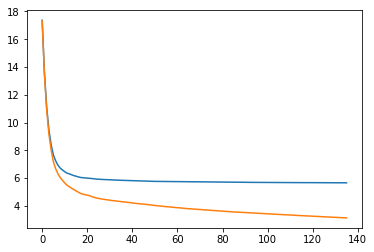

In [152]:
plot(range(xgbCvResult.shape[0]), xgbCvResult['test-rmse-mean'])
plot(range(xgbCvResult.shape[0]), xgbCvResult['train-rmse-mean'])

In [153]:
# best_num_round = np.argmin(xgbCvResult['test-rmse-mean'])
best_num_round = 100
print(best_num_round)

100


In [154]:
bestXgb = xgb.train(params, dtrain_full, best_num_round)

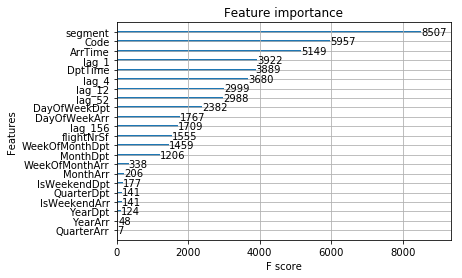

In [155]:
xgb.plot_importance(bestXgb)

In [156]:
xgboost_predict_proba = [int(x)for x in bestXgb.predict(dtest)]
for i in range(0, len(xgboost_predict_proba)):
    if xgboost_predict_proba[i] < 0:
        xgboost_predict_proba[i] = 0
        
mse = mean_squared_error(dtest.get_label(), xgboost_predict_proba)
print('Mse: {0}'.format(mse))

Mse: 126.19986787580325


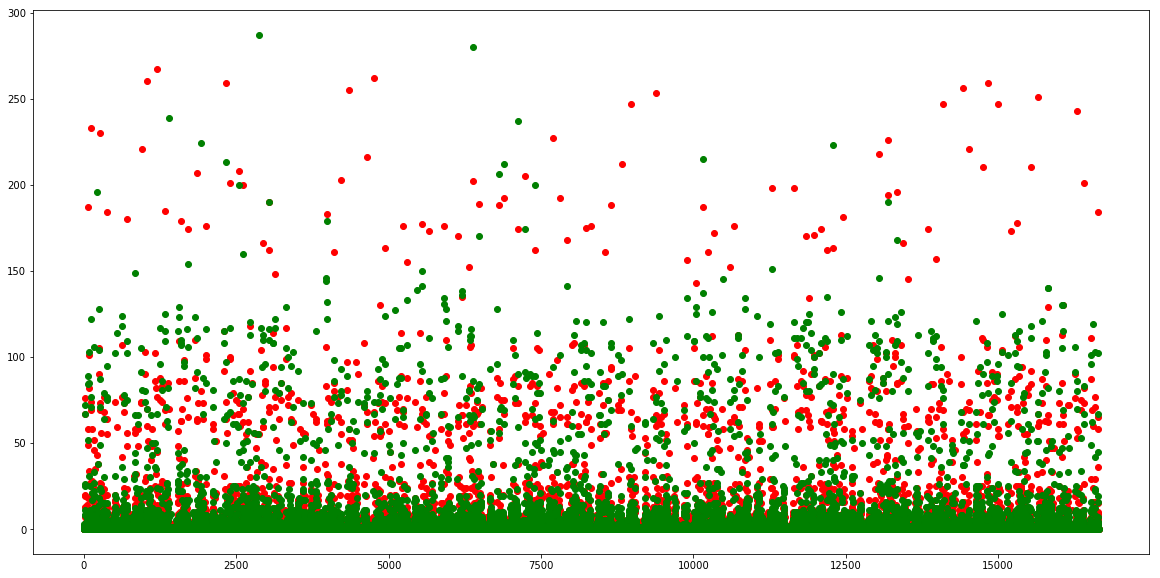

In [157]:
plt.figure(figsize=(20,10))
x = np.arange(0, len(xgboost_predict_proba))
plt.plot(x, xgboost_predict_proba, 'ro', x, dtest.get_label(), 'go')

In [158]:
res = test_data.copy()
res['actual'] = test_y.copy()
res['predictions'] = [int(x) for x in xgboost_predict_proba]
for i in range(0, len(res.predictions)):
    if res.predictions.values[i] < 0:
        res.predictions.values[i] = 0
        
res.tail(125)

,FlightID,Code,fltNrDptDt,DptTime,ArrTime,flightNrSf,segment,DayOfWeekDpt,WeekOfMonthDpt,MonthDpt,...,YearArr,IsWeekendArr,LagDptDt,lag_1,lag_4,lag_12,lag_52,lag_156,actual,predictions
118331,160828,3,2017-03-01,18,7,2,39,2,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,101.0,87
118332,160828,0,2017-03-01,0,4,2,40,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,0.0,1
118333,160828,1,2017-03-01,0,4,2,40,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,0.0,1
118334,160828,2,2017-03-01,0,4,2,40,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,0.0,2
118335,160828,3,2017-03-01,0,4,2,40,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,0.0,0
118336,160828,0,2017-03-01,0,7,2,41,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,2.0,0
118337,160828,1,2017-03-01,0,7,2,41,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,11.0,3
118338,160828,2,2017-03-01,0,7,2,41,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,16.0,4
118339,160828,3,2017-03-01,0,7,2,41,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,12.0,2
118340,160828,0,2017-03-01,5,7,2,42,3,1,3,...,2017,0,2016-03-01,1484.875,1399.689655,1451.070588,1164.720548,1065.051771,0.0,0


In [159]:
res.to_excel("../data/whole_results_" + str(mse) + ".xls")

**Общий прогзноз + год вперед**

In [110]:
wdata = pd.read_csv('../data/4y_prepared_data.csv', sep=';', index_col=0)

In [112]:
wdata.drop('Holiday', axis = 1, inplace = True)

In [113]:
# predict all data
dtrain4y = xgb.DMatrix(wdata.drop("FlightID", axis = 1)
                       .drop("fltNrDptDt", axis = 1)
                       .drop('resHoldTotal', axis = 1).drop('fltNrArrDt', axis = 1).drop('DptDt', axis = 1), 
                       wdata.resHoldTotal)
pred4y = bestXgb.predict(dtrain4y)

In [114]:
wdata['predictions'] = [int(x) for x in pred4y]
for i in range(0, len(wdata.predictions)):
    if wdata.predictions.values[i] < 0:
        wdata.predictions.values[i] = 0

In [115]:
wdata.to_csv('../data/4ypred.csv', sep=';')

In [ ]:
wdata